In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
root_pth = '/Users/valkebets/Documents/Work/project-data/project__sensory_gradients/analyses_clean'
results_pth = root_pth + '/results/gradients_ctx_thal_ipsiLR_sym-thal_aligned_abide1_N211/files'

# Load (first) gradient scores for template & individual gradients
#data = np.load(results_pth + '/ctx_ind_loadings/ind_g1-g2_ctx_thal_loadings_combat.npz') # using gradients scores after combat
data = np.load(results_pth + '/thal_ind_loadings/ind_g1-g2_norm-angle_notaligned_thal_loadings_combat.npz') # using gradients scores after combat

#all_grad_ind_ctx = data['all_g1_ctx_combat'] ###
all_grad_thal = data['data2_combat'] ###

#print('Dimensions of cortical gradient scores:', all_grad_ind_ctx.shape)
print('Dimensions of thalamic gradient scores:', all_grad_thal.shape)

Dimensions of thalamic gradient scores: (648, 211)


In [3]:
# Separate left/right thalamic gradient

n_thal = int(all_grad_thal.shape[0]/2)
print(n_thal)
all_grad_thal_lh = all_grad_thal[:n_thal]
all_grad_thal_rh = all_grad_thal[n_thal:]

print(all_grad_thal_lh.shape, all_grad_thal_rh.shape) # should be (324,211)

324
(324, 211) (324, 211)


In [4]:
# Load demographics with subject IDs

df =  pd.read_csv(root_pth + '/data/abide_func_fn_abideI.csv', header=0) #index_col=0)

# Keep only selected columns
df = df[['ID','OrgID','Group','Site','Func_MeanFD']]

# Remove subject with FD>0.3
df = df.loc[(df['Func_MeanFD'] < 0.3)]

# Move subject 32183 to end
subj_idx = df.index[df.ID == 32183]
subj_idx_list = subj_idx.tolist()
print('Index of subject 32183:', subj_idx_list)

def shift_row_to_bottom(df, index_to_shift):
    idx = [i for i in df.index if i!=index_to_shift]
    return df.loc[idx+[index_to_shift]]

df = shift_row_to_bottom(df, 172)

# Reset index
df.reset_index(drop=True, inplace=True)

# Convert ID & OrigID back to integers
df.ID = df.ID.astype(int)
df.OrgID = df.OrgID.astype(int)

# Get group indices
asd_idx = df.index[df['Group'] == 'ASD'].tolist()
print(len(asd_idx), 'ASD subjects')

td_idx = df.index[df['Group'] == 'CONTROL'].tolist()
print(len(td_idx), 'TD subjects')

df

Index of subject 32183: [172]
103 ASD subjects
108 TD subjects


,ID,OrgID,Group,Site,Func_MeanFD
0,32319,50002,ASD,Pitt,0.116828
1,32321,50004,ASD,Pitt,0.127745
2,32581,50006,ASD,Pitt,0.070143
3,32323,50007,ASD,Pitt,0.151246
4,32324,50008,ASD,Pitt,0.169275
...,...,...,...,...,...
206,32253,51153,CONTROL,NYU,0.045803
207,32254,51154,CONTROL,NYU,0.052091
208,32255,51155,CONTROL,NYU,0.043319
209,32256,51156,CONTROL,NYU,0.100715


In [5]:
# Separate gradients by group
   
# Thalamus
all_grad_thal_lh_asd = all_grad_thal_lh[:,asd_idx]
all_grad_thal_lh_td = all_grad_thal_lh[:,td_idx]

all_grad_thal_rh_asd = all_grad_thal_rh[:,asd_idx]
all_grad_thal_rh_td = all_grad_thal_rh[:,td_idx]

# Should be (324, 103) and (324, 108)
print('Dimensions of individual thalamic scores for ASD subjects: Left - ', all_grad_thal_lh_asd.shape, ' Right - ', all_grad_thal_rh_asd.shape) 
print('Dimensions of individual thalamic scores for TD subjects: Left - ', all_grad_thal_lh_td.shape, ' Right - ', all_grad_thal_rh_td.shape) 

Dimensions of individual thalamic scores for ASD subjects: Left -  (324, 103)  Right -  (324, 103)
Dimensions of individual thalamic scores for TD subjects: Left -  (324, 108)  Right -  (324, 108)


/Users/valkebets/opt/miniconda3/envs/p37/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/valkebets/opt/miniconda3/envs/p37/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


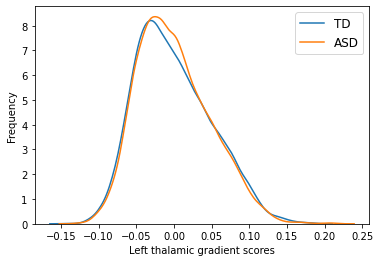

In [6]:
# Plot left thalamic G1 scores for both groups

sns.distplot(all_grad_thal_lh_td, hist=False, kde=True, label='TD')
sns.distplot(all_grad_thal_lh_asd, hist=False, kde=True, label='ASD')
#dff = new_df2[new_df2.Group == 'ASD']
#sns.distplot(dff['390'], hist=False, kde=True, label='ASD')
#dff = new_df2[new_df2.Group == 'CONTROL']
#sns.distplot(dff['390'], hist=False, kde=True, label='TD')
plt.legend(prop={'size' :12})
#plt.title('Thalamic G1 scores in ASD & TD')
plt.xlabel('Left thalamic gradient scores')
plt.ylabel('Frequency')
#plt.savefig(root_pth + '/figs/fig2.png')
plt.show()

/Users/valkebets/opt/miniconda3/envs/p37/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/valkebets/opt/miniconda3/envs/p37/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


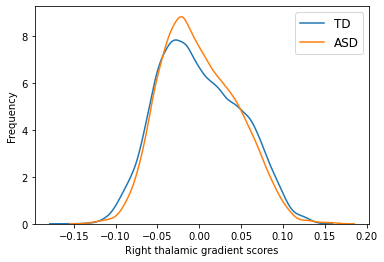

In [7]:
# Plot right thalamic scores for both groups

sns.distplot(all_grad_thal_rh_td, hist=False, kde=True, label='TD')
sns.distplot(all_grad_thal_rh_asd, hist=False, kde=True, label='ASD')
#dff = new_df2[new_df2.Group == 'ASD']
#sns.distplot(dff['390'], hist=False, kde=True, label='ASD')
#dff = new_df2[new_df2.Group == 'CONTROL']
#sns.distplot(dff['390'], hist=False, kde=True, label='TD')
plt.legend(prop={'size' :12})
#plt.title('Thalamic G1 scores in ASD & TD')
plt.xlabel('Right thalamic gradient scores')
plt.ylabel('Frequency')
#plt.savefig(root_pth + '/figs/fig2.png')
plt.show()

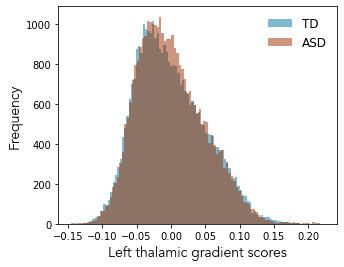

In [6]:
# Prettier version - left thalamus

plt.figure(figsize=(5,4))

plt.hist(all_grad_thal_lh_td.flatten(), bins=100, alpha=0.5, label='TD', color = '#00719c')#'#00719c') #'#01A66F')
plt.hist(all_grad_thal_lh_asd.flatten(), bins=100, alpha=0.5, label='ASD', color = '#9c3100') #'#A61D01')   #'#75CE9F')
plt.legend(loc='upper right', fontsize=12, frameon=False)
plt.xlabel('Left thalamic gradient scores', fontsize=14, fontname='Avenir')
plt.ylabel('Frequency', fontsize=14, fontname='Avenir')
plt.savefig(root_pth + '/figs/fig5.png', dpi=300, bbox_inches = 'tight')
plt.show()


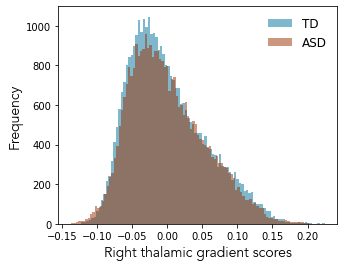

In [7]:
# Prettier version - right thalamus

plt.figure(figsize=(5,4))

plt.hist(all_grad_thal_rh_td.flatten(), bins=100, alpha=0.5, label='TD', color = '#00719c')#'#00719c') #'#01A66F')
plt.hist(all_grad_thal_rh_asd.flatten(), bins=100, alpha=0.5, label='ASD', color = '#9c3100') #'#A61D01')   #'#75CE9F')
plt.legend(loc='upper right', fontsize=12, frameon=False)
plt.xlabel('Right thalamic gradient scores', fontsize=14, fontname='Avenir')
plt.ylabel('Frequency', fontsize=14, fontname='Avenir')
plt.savefig(root_pth + '/figs/fig6.png', dpi=300, bbox_inches = 'tight')
plt.show()


In [11]:
# Scatterplot G1-G2

#all_grad_ind_ctx = data['all_g1_ctx_combat'] ###
g1_scores = data['data1_combat'] ###
g2_scores = data['data2_combat'] ###

print(g1_scores.shape, g2_scores.shape) # should be (648,211)

# Separate per group
g1_scores_asd = g1_scores[:,asd_idx]
g1_scores_td = g1_scores[:,td_idx]
g2_scores_asd = g2_scores[:,asd_idx]
g2_scores_td = g2_scores[:,td_idx]

print(g1_scores_asd.shape, g2_scores_asd.shape) # should be (648,103)
print(g1_scores_td.shape, g2_scores_td.shape) # should be (648,108)

(648, 211) (648, 211)
(648, 103) (648, 103)
(648, 108) (648, 108)


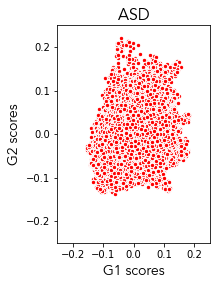

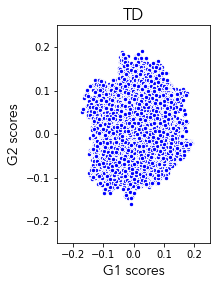

In [40]:
# All thalamus 

plt.subplot(121)
plt.scatter(g1_scores_asd, g2_scores_asd, s=20, color='red', edgecolors='white')
plt.title('ASD', fontsize=16, fontname='Avenir')
plt.xlabel('G1 scores', fontsize=14, fontname='Avenir')
plt.ylabel('G2 scores', fontsize=14, fontname='Avenir')
#plt.savefig(root_pth + '/figs/fig8.png', dpi=300, bbox_inches = 'tight')
plt.ylim(-0.25, 0.25)
plt.xlim(-0.25, 0.25)
plt.show()

plt.subplot(122)
plt.scatter(g1_scores_td, g2_scores_td, s=20, color='blue', edgecolors='white')
plt.title('TD', fontsize=16, fontname='Avenir')
plt.xlabel('G1 scores', fontsize=14, fontname='Avenir')
plt.ylabel('G2 scores', fontsize=14, fontname='Avenir')
plt.ylim(-0.25, 0.25)
plt.xlim(-0.25, 0.25)
#plt.savefig(root_pth + '/figs/fig8.png', dpi=300, bbox_inches = 'tight')
plt.show()

In [12]:
# Separate left / right thalamus

g1_scores_asd_lh = g1_scores_asd[:n_thal,:]
g1_scores_asd_rh = g1_scores_asd[n_thal:,:]

g1_scores_td_lh = g1_scores_td[:n_thal,:]
g1_scores_td_rh = g1_scores_td[n_thal:,:]

g2_scores_asd_lh = g2_scores_asd[:n_thal,:]
g2_scores_asd_rh = g2_scores_asd[n_thal:,:]

g2_scores_td_lh = g2_scores_td[:n_thal,:]
g2_scores_td_rh = g2_scores_td[n_thal:,:]


print(g1_scores_asd_lh.shape, g1_scores_asd_rh.shape)
print(g1_scores_td_lh.shape, g1_scores_td_rh.shape)

(324, 103) (324, 103)
(324, 108) (324, 108)


(-0.25, 0.25)

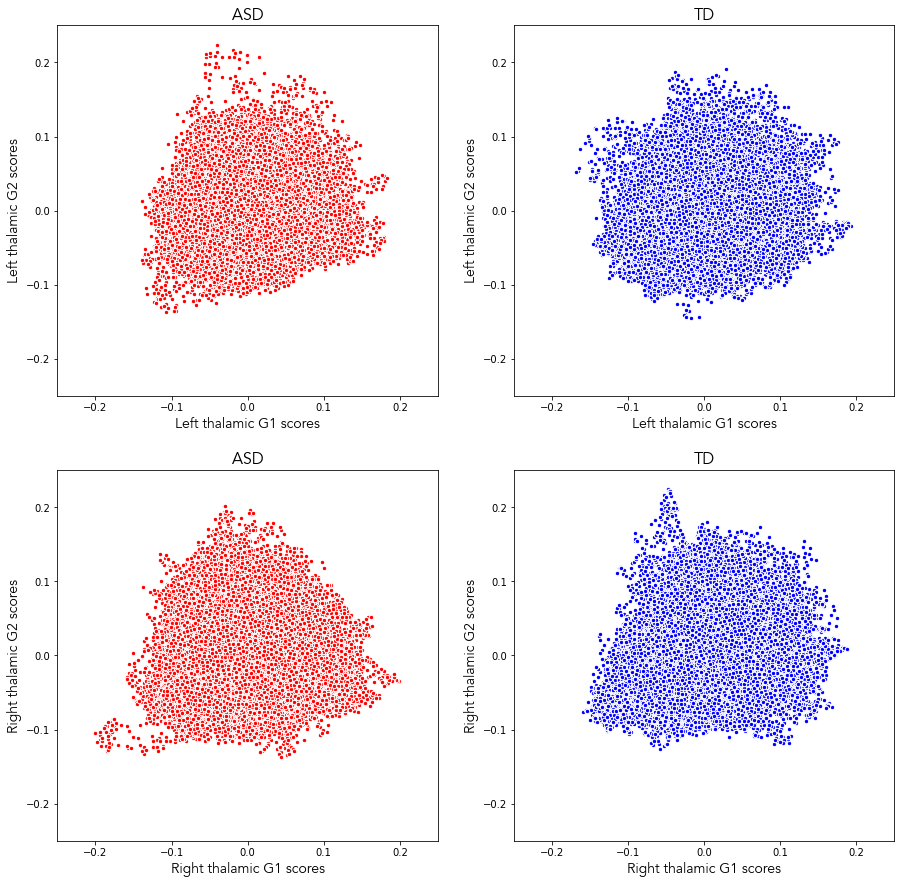

In [13]:
# Left / right thalamus separately

fig, axs = plt.subplots(2, 2, figsize=(15,15))

#plt.subplot(0,0)
axs[0,0].scatter(g1_scores_asd_lh, g2_scores_asd_lh, s=20, color='red', edgecolors='white')
axs[0,0].set_title('ASD', fontsize=16, fontname='Avenir')
axs[0,0].set_xlabel('Left thalamic G1 scores', fontsize=14, fontname='Avenir')
axs[0,0].set_ylabel('Left thalamic G2 scores', fontsize=14, fontname='Avenir')
#plt.savefig(root_pth + '/figs/fig8.png', dpi=300, bbox_inches = 'tight')
axs[0,0].set_ylim(-0.25, 0.25)
axs[0,0].set_xlim(-0.25, 0.25)
#axs[0,0].show()

#plt.subplot(0,1)
axs[0,1].scatter(g1_scores_td_lh, g2_scores_td_lh, s=20, color='blue', edgecolors='white')
axs[0,1].set_title('TD', fontsize=16, fontname='Avenir')
axs[0,1].set_xlabel('Left thalamic G1 scores', fontsize=14, fontname='Avenir')
axs[0,1].set_ylabel('Left thalamic G2 scores', fontsize=14, fontname='Avenir')
axs[0,1].set_ylim(-0.25, 0.25)
axs[0,1].set_xlim(-0.25, 0.25)
#plt.savefig(root_pth + '/figs/fig8.png', dpi=300, bbox_inches = 'tight')
#plt.show()

#plt.subplot(1,0)
axs[1,0].scatter(g1_scores_asd_rh, g2_scores_asd_rh, s=20, color='red', edgecolors='white')
axs[1,0].set_title('ASD', fontsize=16, fontname='Avenir')
axs[1,0].set_xlabel('Right thalamic G1 scores', fontsize=14, fontname='Avenir')
axs[1,0].set_ylabel('Right thalamic G2 scores', fontsize=14, fontname='Avenir')
#plt.savefig(root_pth + '/figs/fig8.png', dpi=300, bbox_inches = 'tight')
axs[1,0].set_ylim(-0.25, 0.25)
axs[1,0].set_xlim(-0.25, 0.25)
#plt.show()

#plt.subplot(1,1)
axs[1,1].scatter(g1_scores_td_rh, g2_scores_td_rh, s=20, color='blue', edgecolors='white')
axs[1,1].set_title('TD', fontsize=16, fontname='Avenir')
axs[1,1].set_xlabel('Right thalamic G1 scores', fontsize=14, fontname='Avenir')
axs[1,1].set_ylabel('Right thalamic G2 scores', fontsize=14, fontname='Avenir')
axs[1,1].set_ylim(-0.25, 0.25)
axs[1,1].set_xlim(-0.25, 0.25)
#plt.savefig(root_pth + '/figs/fig8.png', dpi=300, bbox_inches = 'tight')
#plt.show()

#plt.savefig(root_pth + '/figs/fig8.png', dpi=300, bbox_inches = 'tight')

In [ ]:
# Cortex
#all_grad_ind_ctx_asd = all_grad_ind_ctx[asd_idx,:]
#all_grad_ind_ctx_td = all_grad_ind_ctx[td_idx,:]

#print('Dimensions of individual cortical scores in ASD subjects:', all_grad_ind_ctx_asd.shape)
#print('Dimensions of individual cortical scores for TD subjects:', all_grad_ind_ctx_td.shape)

In [ ]:
# Plot cortical G1 scores for both groups

sns.distplot(all_grad_ind_ctx_td, hist=False, kde=True, label='TD')
sns.distplot(all_grad_ind_ctx_asd, hist=False, kde=True, label='ASD')

#dff = new_df2[new_df2.Group == 'ASD']
#sns.distplot(dff['390'], hist=False, kde=True, label='ASD')
#dff = new_df2[new_df2.Group == 'CONTROL']
#sns.distplot(dff['390'], hist=False, kde=True, label='TD')
plt.legend(prop={'size' :12})
#plt.title('Cortical G1 scores in ASD & TD')
plt.xlabel('Cortical G1 scores')
plt.ylabel('Frequency')
plt.savefig(root_pth + '/figs/fig1.png')
plt.show()

In [ ]:
# Convert to 1D >> not necessary

all_grad_ind_ctx_asd_1d = all_grad_ind_ctx_asd.flatten()
print('Dimensions of 1d cortical G1 scores in ASD: ', all_grad_ind_ctx_asd_1d.shape)

all_grad_ind_ctx_td_1d = all_grad_ind_ctx_td.flatten()
print('Dimensions of 1d cortical G1 scores in TD:  ', all_grad_ind_ctx_td_1d.shape)

all_grad_ind_thal_asd_1d = all_grad_ind_thal_asd.flatten()
print('Dimensions of 1d thalamic G1 scores in ASD: ', all_grad_ind_thal_asd_1d.shape)

all_grad_ind_thal_td_1d = all_grad_ind_thal_td.flatten()
print('Dimensions of 1d thalamic G1 scores in TD:  ', all_grad_ind_thal_td_1d.shape)

In [ ]:
# Prettier version - cortex

plt.figure(figsize=(5,4))

plt.hist(all_grad_ind_ctx_td_1d, bins=100, alpha=0.5, label='TD', color = '#00719c')#'#00719c') #'#01A66F')
plt.hist(all_grad_ind_ctx_asd_1d, bins=100, alpha=0.5, label='ASD', color = '#9c3100') #'#A61D01')   #'#75CE9F')
plt.legend(loc='upper right', fontsize=12, frameon=False)
plt.xlabel('Cortical G1 scores', fontsize=14, fontname='Avenir')
plt.ylabel('Frequency', fontsize=14, fontname='Avenir')
plt.savefig(root_pth + '/figs/fig3.png', dpi=300, bbox_inches = 'tight')
plt.show()
